#Transformada de Fourier Rapida

##1-D discrete Fourier transforms

In [3]:
from scipy.fft import fft, ifft
import numpy as np
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
y

array([ 4.5       -0.j        ,  2.08155948-1.65109876j,
       -1.83155948+1.60822041j, -1.83155948-1.60822041j,
        2.08155948+1.65109876j])

In [4]:
yinv = ifft(y)
yinv

array([ 1. +0.j,  2. +0.j,  1. +0.j, -1. +0.j,  1.5+0.j])

In [5]:
np.sum(x)

4.5

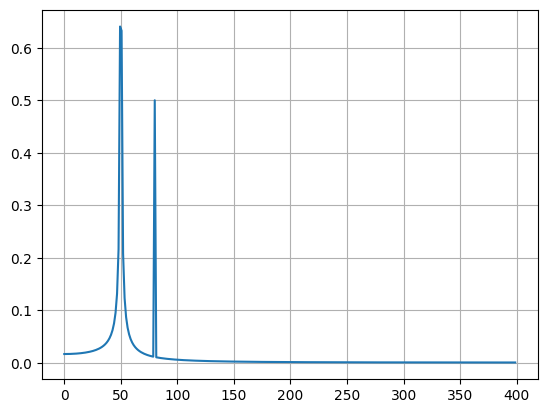

In [6]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

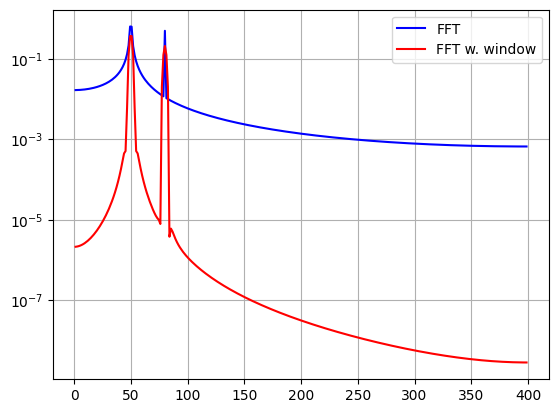

In [7]:
from scipy.fft import fft, fftfreq
import numpy as np
# Number of sample points
N = 600
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
from scipy.signal.windows import blackman
w = blackman(N)
ywf = fft(y*w)
xf = fftfreq(N, T)[:N//2]
import matplotlib.pyplot as plt
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()
plt.show()

In [8]:
from scipy.fft import fftfreq
freq = fftfreq(8, 0.125)
freq

array([ 0.,  1.,  2.,  3., -4., -3., -2., -1.])

In [9]:
from scipy.fft import fftshift
x = np.arange(8)
fftshift(x)

array([4, 5, 6, 7, 0, 1, 2, 3])

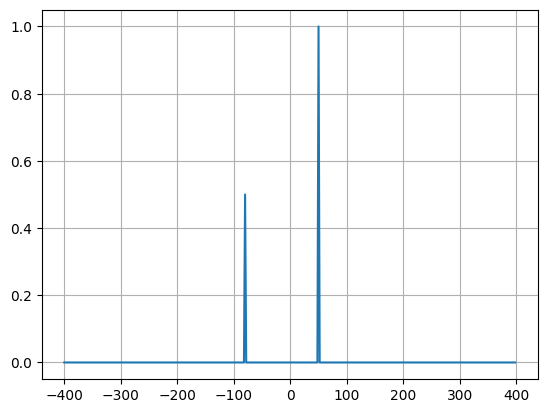

In [10]:
from scipy.fft import fft, fftfreq, fftshift
import numpy as np
# number of signal points
N = 400
# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.exp(50.0 * 1.j * 2.0*np.pi*x) + 0.5*np.exp(-80.0 * 1.j * 2.0*np.pi*x)
yf = fft(y)
xf = fftfreq(N, T)
xf = fftshift(xf)
yplot = fftshift(yf)
import matplotlib.pyplot as plt
plt.plot(xf, 1.0/N * np.abs(yplot))
plt.grid()
plt.show()

In [11]:
from scipy.fft import fft, rfft, irfft
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5, 1.0])
fft(x)

array([ 5.5 -0.j        ,  2.25-0.4330127j , -2.75-1.29903811j,
        1.5 -0.j        , -2.75+1.29903811j,  2.25+0.4330127j ])

In [12]:
yr = rfft(x)
yr

array([ 5.5 +0.j        ,  2.25-0.4330127j , -2.75-1.29903811j,
        1.5 +0.j        ])

In [13]:
irfft(yr)

array([ 1. ,  2. ,  1. , -1. ,  1.5,  1. ])

In [14]:
fft(x)

array([ 5.5 -0.j        ,  2.25-0.4330127j , -2.75-1.29903811j,
        1.5 -0.j        , -2.75+1.29903811j,  2.25+0.4330127j ])

In [15]:
yr = rfft(x)
yr

array([ 5.5 +0.j        ,  2.25-0.4330127j , -2.75-1.29903811j,
        1.5 +0.j        ])

In [16]:
irfft(yr)

array([ 1. ,  2. ,  1. , -1. ,  1.5,  1. ])

In [17]:
irfft(yr, n=len(x))

array([ 1. ,  2. ,  1. , -1. ,  1.5,  1. ])

##2- and N-D discrete Fourier transforms

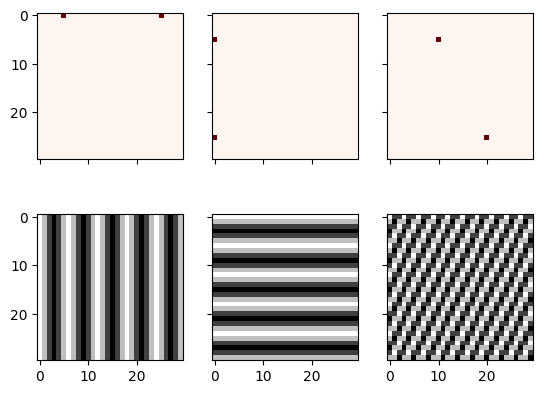

In [18]:
from scipy.fft import ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np
N = 30
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')
xf = np.zeros((N,N))
xf[0, 5] = 1
xf[0, N-5] = 1
Z = ifftn(xf)
ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
Z = ifftn(xf)
ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1
Z = ifftn(xf)
ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)
plt.show()

#Discrete Cosine Transforms

La transformada de coseno discreta expresa una secuencia finita de varios puntos como resultado de la suma de distintas señales sinusoidales (con distintas frecuencias y amplitudes). Como la transformada discreta de Fourier la DCT trabaja con una serie de números finitos, pero mientras la DCT solo trabaja con cosenos la DFT lo hace con exponenciales complejos.

## DCT y IDCT

In [20]:
from scipy.fft import dct, idct
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
dct(dct(x, type=2, norm='ortho'), type=3, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [21]:
dct(dct(x, type=2), type=3)

array([ 10.,  20.,  10., -10.,  15.])

In [23]:
# Inverso normalizado: sin factor de escala
idct(dct(x, type=2), type=2)

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [25]:
dct(dct(x, type=1, norm='ortho'), type=1, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [26]:
dct(dct(x, type=1), type=1)

array([ 8., 16.,  8., -8., 12.])

In [27]:
idct(dct(x, type=1), type=1)

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [28]:
dct(dct(x, type=4, norm='ortho'), type=4, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [29]:
dct(dct(x, type=4), type=4)

array([ 10.,  20.,  10., -10.,  15.])

In [30]:
idct(dct(x, type=4), type=4)

array([ 1. ,  2. ,  1. , -1. ,  1.5])

## Ejemplo

In [31]:
from scipy.fft import dct, idct
import matplotlib.pyplot as plt
N = 100
t = np.linspace(0,20,N, endpoint=False)
x = np.exp(-t/3)*np.cos(2*t)
y = dct(x, norm='ortho')
window = np.zeros(N)
window[:20] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)

0.0009872817275276098

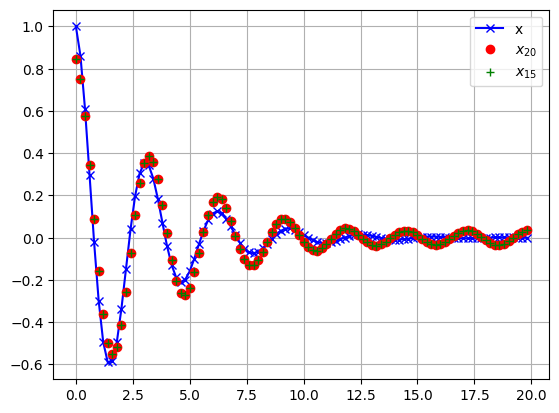

In [34]:
plt.plot(t, x, '-bx')
plt.plot(t, yr, 'ro')
window = np.zeros(N)
window[:15] = 1
yr = idct(y*window, norm='ortho')
sum(abs(x-yr)**2) / sum(abs(x)**2)
plt.plot(t, yr, 'g+')
plt.legend(['x', '$x_{20}$', '$x_{15}$'])
plt.grid()
plt.show()


## DST y IDST

In [40]:
from scipy.fft import dst, idst
x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
dst(dst(x, type=2, norm='ortho'), type=3, norm='ortho')

[ 1.   2.   1.  -1.   1.5]
[ 10.  20.  10. -10.  15.]
[ 1.   2.   1.  -1.   1.5]


In [38]:
dst(dst(x, type=2), type=3)

array([ 10.,  20.,  10., -10.,  15.])

In [41]:
idst(dst(x, type=2), type=2)

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [42]:
dst(dst(x, type=1, norm='ortho'), type=1, norm='ortho')


array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [43]:
dst(dst(x, type=1), type=1)

array([ 12.,  24.,  12., -12.,  18.])

In [44]:
idst(dst(x, type=1), type=1)

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [45]:
dst(dst(x, type=4, norm='ortho'), type=4, norm='ortho')

array([ 1. ,  2. ,  1. , -1. ,  1.5])

In [46]:
dst(dst(x, type=4), type=4)

array([ 10.,  20.,  10., -10.,  15.])

In [47]:
idst(dst(x, type=4), type=4)

array([ 1. ,  2. ,  1. , -1. ,  1.5])